# Shuttle Tebrau Origin-Destination Pair by Hour

In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and Preview Data
df = pd.read_csv('shuttle_tebrau_2025.csv')
df.head()

,date,time,origin,destination,ridership
0,2025-01-01,05:00,JB Sentral,Woodlands CIQ,121
1,2025-01-01,06:00,JB Sentral,Woodlands CIQ,124
2,2025-01-01,07:00,JB Sentral,Woodlands CIQ,340
3,2025-01-01,08:00,Woodlands CIQ,JB Sentral,322
4,2025-01-01,08:00,JB Sentral,Woodlands CIQ,323


In [4]:
# Preprocess Data for Hourly Origin-Destination Analysis
df['hour'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour
df['od_pair'] = df['origin'] + ' → ' + df['destination']
df[['date', 'hour', 'od_pair', 'ridership']].head()

,date,hour,od_pair,ridership
0,2025-01-01,5,JB Sentral → Woodlands CIQ,121
1,2025-01-01,6,JB Sentral → Woodlands CIQ,124
2,2025-01-01,7,JB Sentral → Woodlands CIQ,340
3,2025-01-01,8,Woodlands CIQ → JB Sentral,322
4,2025-01-01,8,JB Sentral → Woodlands CIQ,323


In [5]:
# Aggregate Trips by Hour and Origin-Destination Pair
od_hourly = df.groupby(['hour', 'od_pair'])['ridership'].sum().reset_index()
od_hourly_pivot = od_hourly.pivot(index='od_pair', columns='hour', values='ridership').fillna(0)
od_hourly_pivot.head()

hour,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
od_pair,,,,,,,,,,,,,,,,,,,
JB Sentral → Woodlands CIQ,148108.0,157498.0,175362.0,98186.0,0.0,78113.0,75218.0,71454.0,0.0,68649.0,96376.0,99407.0,99159.0,0.0,98901.0,98679.0,98736.0,86814.0,0.0
Woodlands CIQ → JB Sentral,0.0,0.0,0.0,95666.0,99477.0,0.0,88937.0,96572.0,81983.0,0.0,59735.0,58921.0,70637.0,88440.0,0.0,83696.0,73613.0,56599.0,32404.0


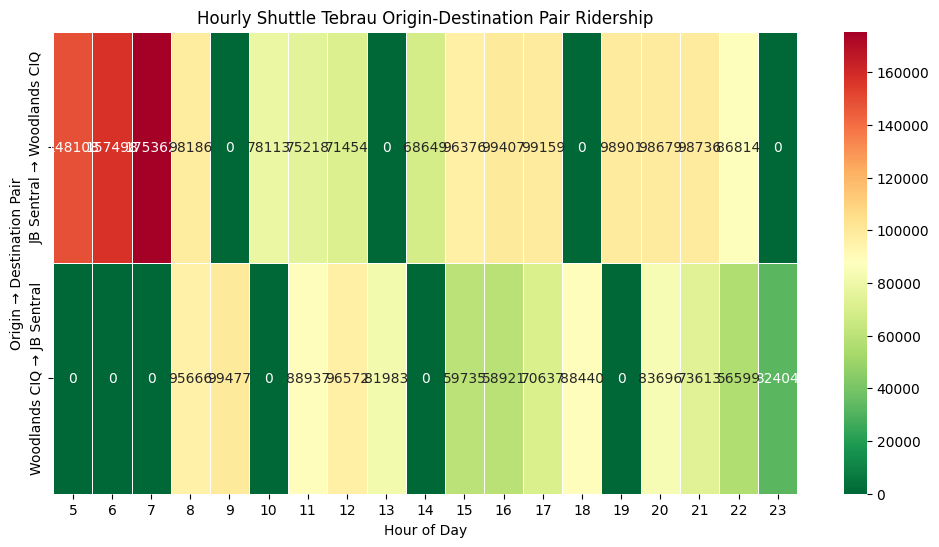

In [6]:
# Visualize Hourly Origin-Destination Pair Counts
plt.figure(figsize=(12, 6))
sns.heatmap(od_hourly_pivot, annot=True, fmt='.0f', cmap='RdYlGn_r', linewidths=.5)
plt.title('Hourly Shuttle Tebrau Origin-Destination Pair Ridership')
plt.xlabel('Hour of Day')
plt.ylabel('Origin → Destination Pair')
plt.show()